## Goals of this Assignment
1. Create a linear model that describes the effect of various features on price
2. The model should be interpretable for analysis by management

### 1. Import the data 

In [1]:
# import standard libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#import and view the data
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 2. Basic understanding of the data 

In [4]:
# view the shape of the data frame
df.shape

(730, 16)

In [5]:
# Understand the basic distribution of the data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Understand the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<Figure size 1440x1080 with 0 Axes>

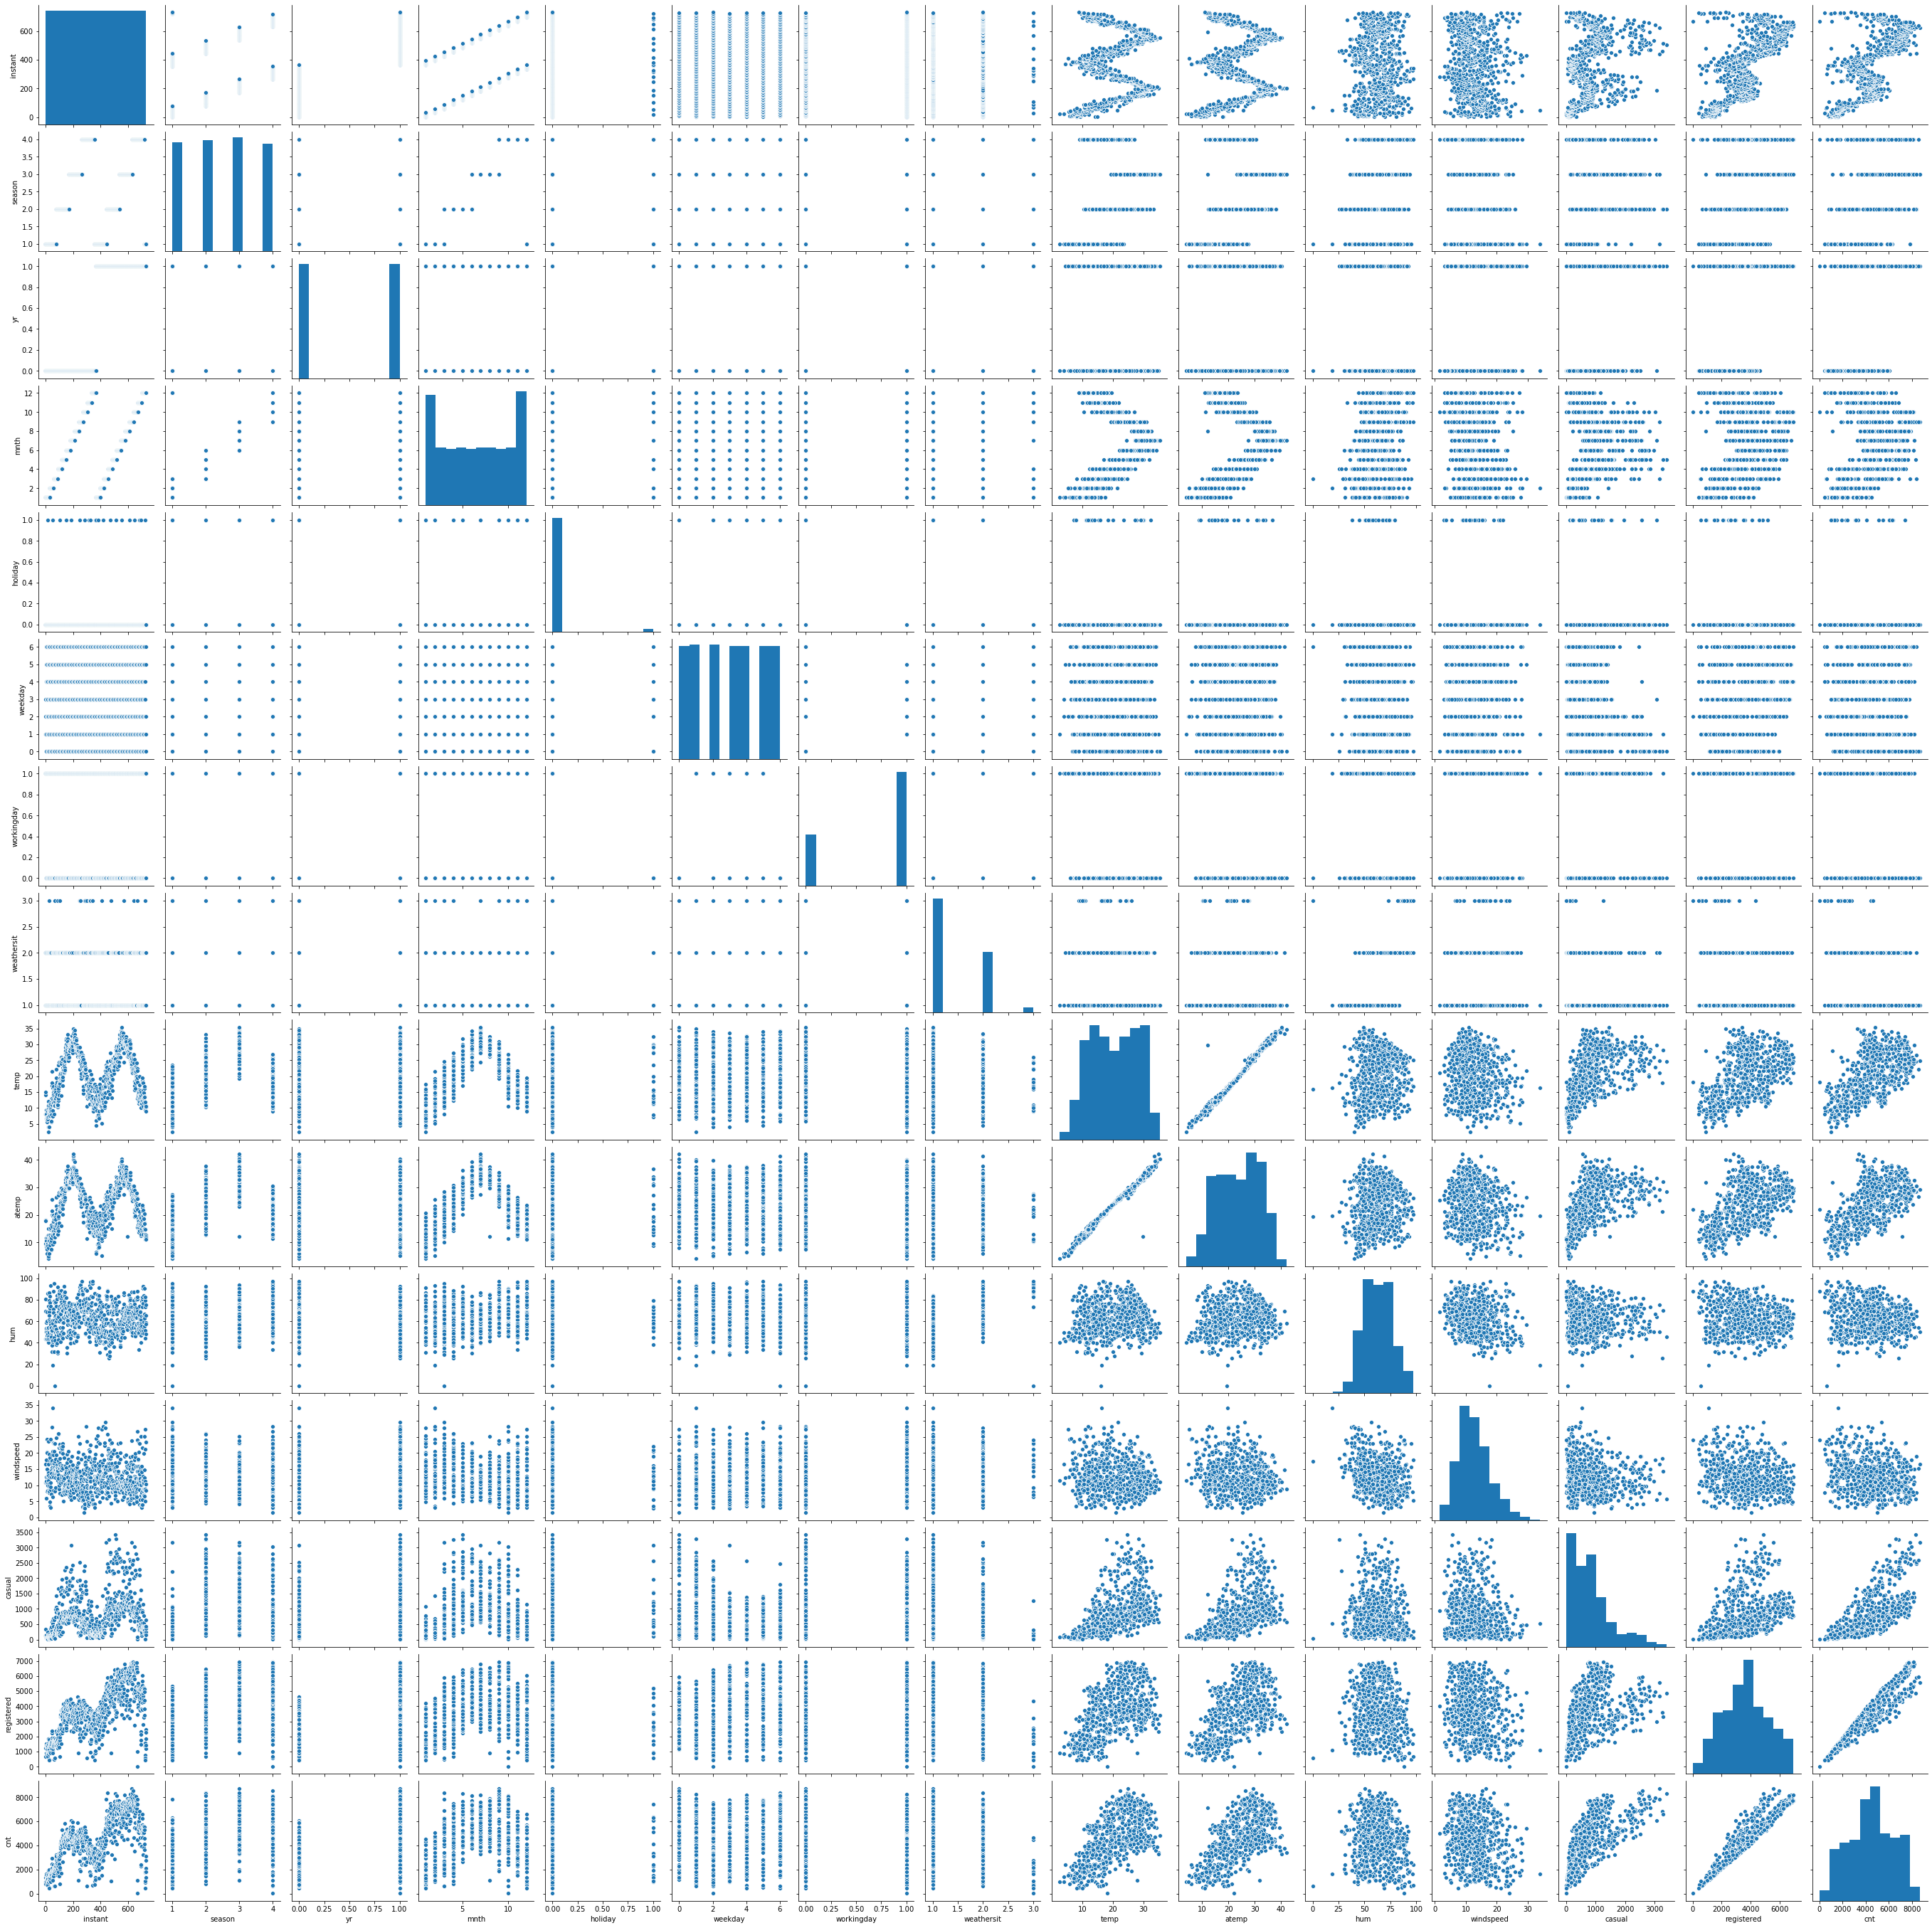

In [7]:
# Visualise the numerical variables
plt.figure(figsize=(20,15))
sns.pairplot(df)
plt.show()

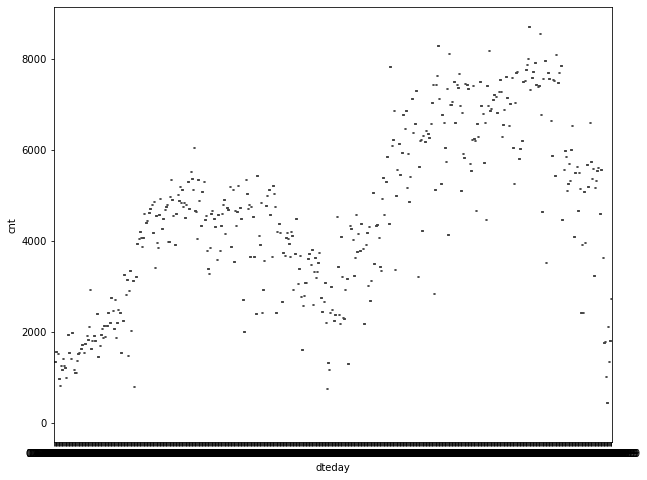

In [8]:
# Visualise the categorical variables
plt.figure(figsize=(10,8))
sns.boxplot(x = 'dteday', y = 'cnt', data=df)

In [9]:
df.dteday.head()

0    01-01-2018
1    02-01-2018
2    03-01-2018
3    04-01-2018
4    05-01-2018
Name: dteday, dtype: object

As we can see, due to the data type and number of data points, using a box plot directly does not allows us to infer much.

### 3. Data Type Identification

### 3.1 Identify categorical and continuous data

In [10]:
# Extract the columns
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [12]:
# Identify the categorical variables
category_features = []
threshold = 62
for each in df.columns:
    if df[each].nunique() < threshold:
        category_features.append(each)

In [13]:
# View the categorical features
category_features

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

Of the above variable, on studying the data set we see that 'yr', 'holiday' and 'workingday' are binary values and not categorical.

### 3.2 Drop unnecessary variables

In [14]:
df2 = df.drop(labels=['instant', 'dteday', 'casual', 'registered'], axis=1)
df2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
df2.shape

(730, 12)

### 3.3 Check the data type for each column and make necessary changes

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


Now as we have seen,<b> 'season', 'mnth', 'weekday and 'weathersit'</b> are categorical features. But, their data types are all int type. Therefore, the first step here would be to convert them to an object type.

In [17]:
# Mapping the values in season 
df2["season"] = df2.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })

In [18]:
# Mapping the values in mnth
df2["mnth"] = df2.mnth.map({1: "January", 2 : "February", 3 : "March", 4 :"April", 5 :"May", 6 :"June", 7 :"July", 8 :"August", 9 :"September", 10 :"October", 11 :"Noveber", 12 :"December" })

In [19]:
# Mapping the values in weekday
df2["weekday"] = df2.weekday.map({0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"})

In [20]:
# Mapping the values in weathersit
df2["weathersit"] = df2.weathersit.map({1: "Clear", 2: "Cloudy", 3: "Light Snow Rain", 4: "Heavy Snow Rain"})

In [21]:
catVarList = ["mnth","season","weekday","weathersit"]
for var in catVarList:
    df2[var] = df2[var].astype(str)

In [22]:
df2.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

### 4 Data Visualisation

### 4.1 Check for correlations

<Figure size 1440x1080 with 0 Axes>

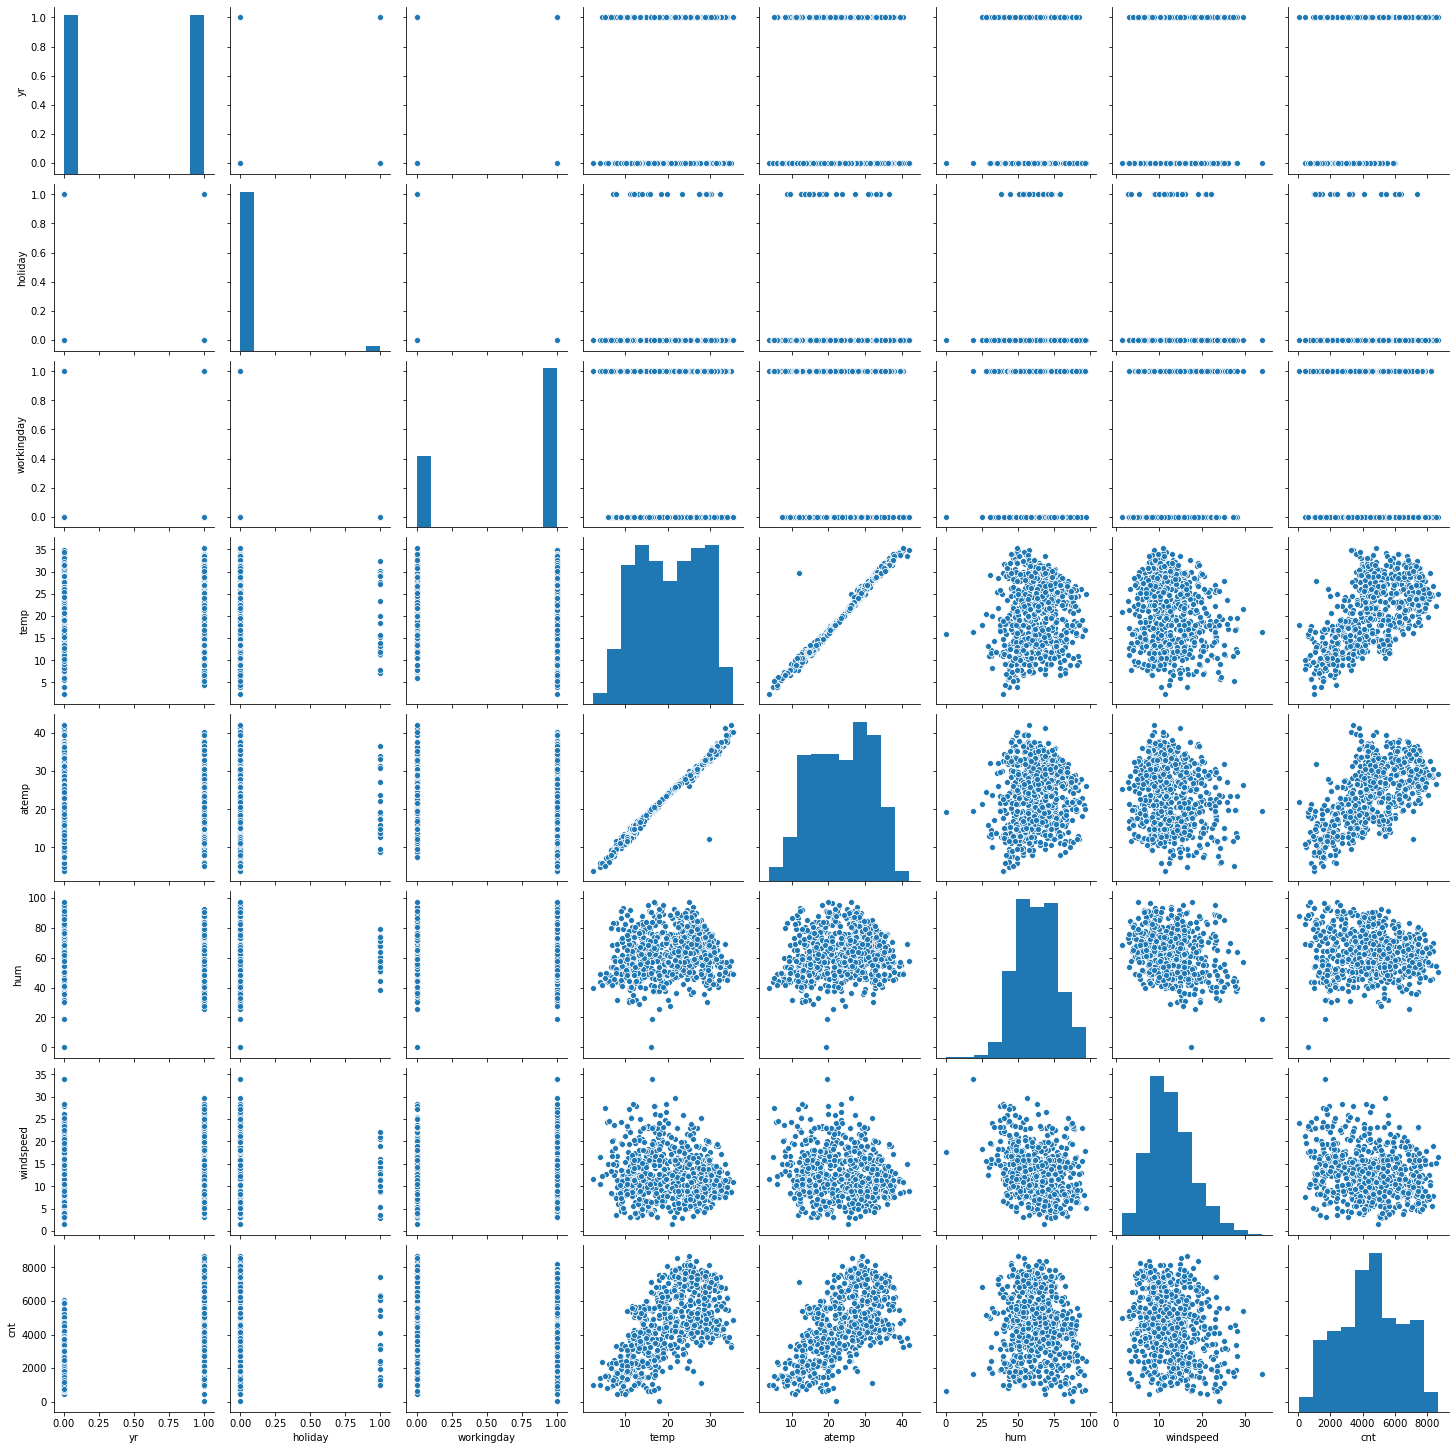

In [23]:
# Plot a pairplot between the numerical variables
plt.figure(figsize=(20,15))
sns.pairplot(df2)
plt.show()

- Analysis from the above pairplot is as follows,

1. Features temp and atemp seem to have a linear correlation with our target variable cnt
2. Features teamp and atemp also seem to be highly correlated with each other. Therefore one can be dropped.
3. The target variable column i.e cnt column could have a normal distribution
4. Windspeed & hum column do not show any linear relationship with the target column
5. For Workingday variable vs cnt, the data is almost equally distributed
6. The holiday variable vs cnt has higher number of data points in 0 as compared to 1 

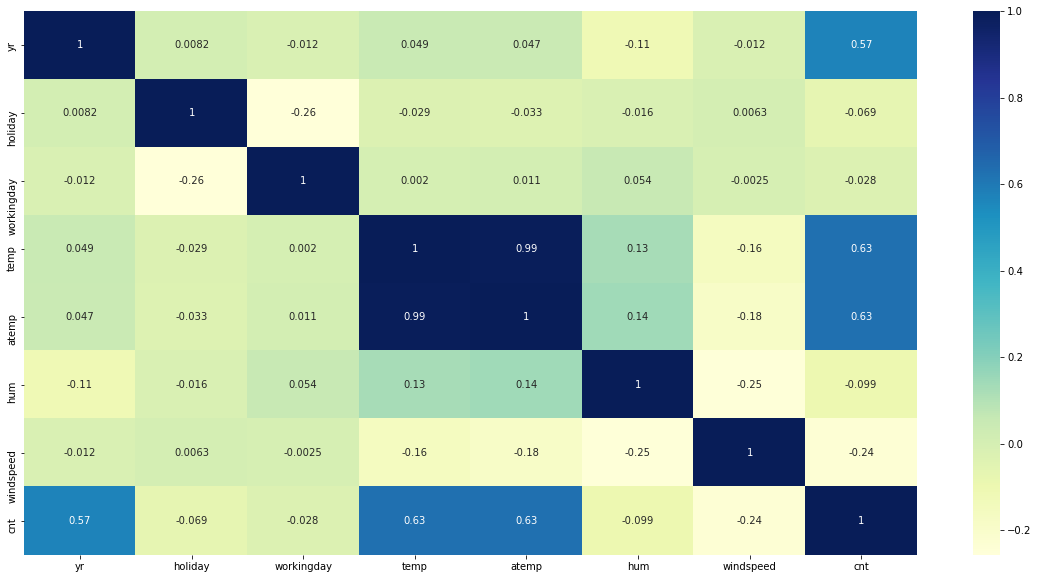

In [24]:
# Lets try and quantify the correlation to be sure
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(df2.corr(), cmap="YlGnBu", annot = True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

From the above heatmap, we can confirm that temp and atemp are highly correlated and one of them needs to be dropped.

In [25]:
df2 = df2.drop(labels="atemp", axis=1)

In [26]:
df2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


### 5. Data Preparation

### 5.1 Create dummy variables for categorical data

As mentioned above, our categorical variables are,

- season
- mnth
- weekday
- weathersit

#### Season Column

In [27]:
# Let's have a look at season
df2.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

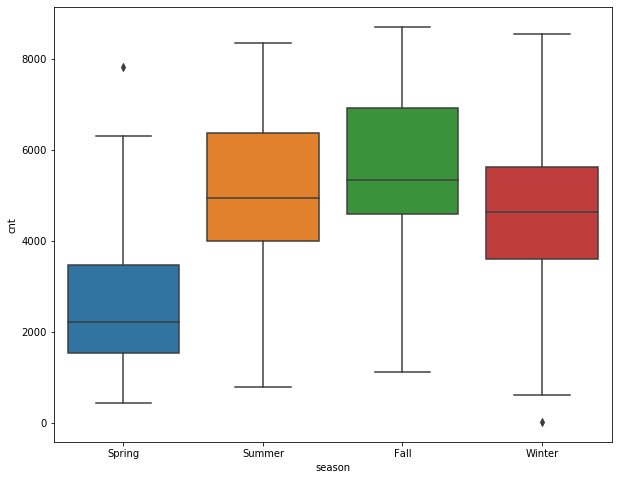

In [28]:
# Plotting season vs our target variable
plt.figure(figsize=(10,8))
sns.boxplot(x = 'season', y = 'cnt', data = df2)
plt.show()

- Analysis from the above box plot is as follows,

1. Fall has the highest values as compared to the other seasons
2. Fall also has a higher median value as compared to other seasons and most of the values are in the upper quartile range
3. Spring has the lowest value and median


In [29]:
# Creating dummy variables for season

dummy_season = pd.get_dummies(df2['season'], drop_first=True)
dummy_season.nunique()

Spring    2
Summer    2
Winter    2
dtype: int64

In [30]:
# Joining the encoded values with the data frame
df2 = pd.concat([df2, dummy_season], axis=1)

In [31]:
df2 = df2.drop(labels = 'season', axis=1)

In [32]:
df2.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,Winter
0,0,January,0,Monday,1,Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,0,January,0,Tuesday,1,Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


#### mnth Column

In [33]:
# Let's have a look at mnth
df2.mnth.value_counts()

May          62
January      62
August       62
October      62
March        62
December     62
July         62
June         60
September    60
Noveber      60
April        60
February     56
Name: mnth, dtype: int64

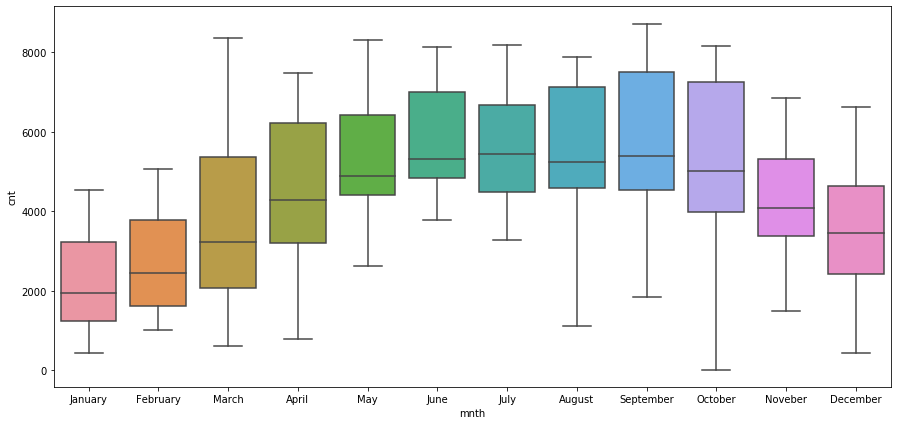

In [34]:
# Plotting mnth vs our target variable
plt.figure(figsize=(15,7))
sns.boxplot(x = 'mnth', y = 'cnt', data = df2, order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'Noveber', 'December'])
plt.show()

- Analysis from the above box plot is as follows,

1. September has the highest cnt values
2. Median of July month is the highest
3. October has the lowest values where as january has the lowest median

In [35]:
# Creating dummy variables for mnth

dummy_mnth = pd.get_dummies(df2['mnth'], drop_first=True)
dummy_mnth.nunique()

August       2
December     2
February     2
January      2
July         2
June         2
March        2
May          2
Noveber      2
October      2
September    2
dtype: int64

In [36]:
dummy_mnth.head()

,August,December,February,January,July,June,March,May,Noveber,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [37]:
# Check count for every month
dummy_mnth.count()

August       730
December     730
February     730
January      730
July         730
June         730
March        730
May          730
Noveber      730
October      730
September    730
dtype: int64

In [38]:
# Joining the encoded values with the data frame
df2 = pd.concat([df2, dummy_mnth], axis=1)
df2.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,December,February,January,July,June,March,May,Noveber,October,September
0,0,January,0,Monday,1,Cloudy,14.110847,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,January,0,Tuesday,1,Cloudy,14.902598,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,January,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,January,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,January,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [39]:
df2 = df2.drop(labels = "mnth", axis = 1)
df2.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,...,December,February,January,July,June,March,May,Noveber,October,September
0,0,0,Monday,1,Cloudy,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Tuesday,1,Cloudy,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


#### Weekday

In [40]:
# Let's have a look at weekday
df2.weekday.value_counts()

Tuesday      105
Monday       105
Friday       104
Thursday     104
Sunday       104
Saturday     104
Wednesday    104
Name: weekday, dtype: int64

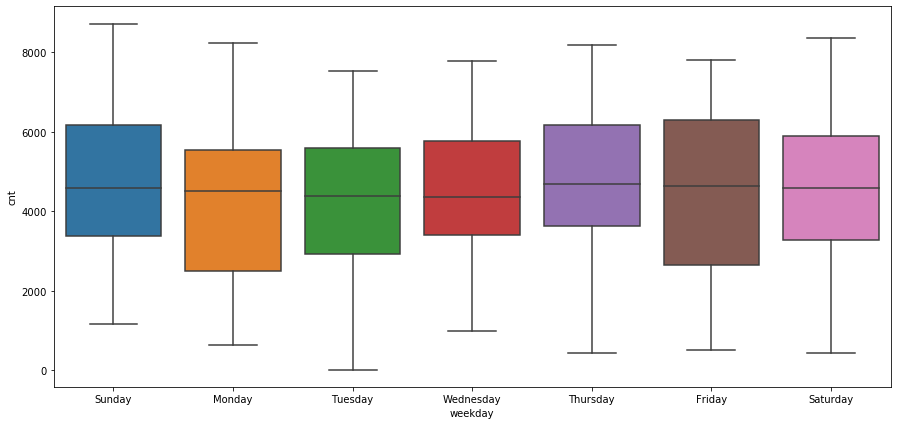

In [41]:
# Plotting weekday vs our target variable
plt.figure(figsize=(15,7))
sns.boxplot(x = 'weekday', y = 'cnt', data = df2, order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()

- Analysis from the above box plot are as follows,

1. Highest cnt is observed on Sunday with Saturday and Monday coming in second
2. Lowest values are observer on Tuesday

In [42]:
# Creating dummy variables for weekday
dummy_weekday = pd.get_dummies(df2['weekday'], drop_first=True)
dummy_weekday.nunique()

Monday       2
Saturday     2
Sunday       2
Thursday     2
Tuesday      2
Wednesday    2
dtype: int64

In [43]:
dummy_weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [44]:
df2 = pd.concat([df2, dummy_weekday], axis = 1)
df2.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,...,May,Noveber,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,Monday,1,Cloudy,14.110847,80.5833,10.749882,985,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,Tuesday,1,Cloudy,14.902598,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df2 = df2.drop(labels = 'weekday', axis=1)

In [46]:
df2.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,...,May,Noveber,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,Cloudy,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,Cloudy,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,Clear,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,Clear,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,Clear,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Weathersit

In [47]:
# Let's have a look at weathersit
df2.weathersit.value_counts()

Clear              463
Cloudy             246
Light Snow Rain     21
Name: weathersit, dtype: int64

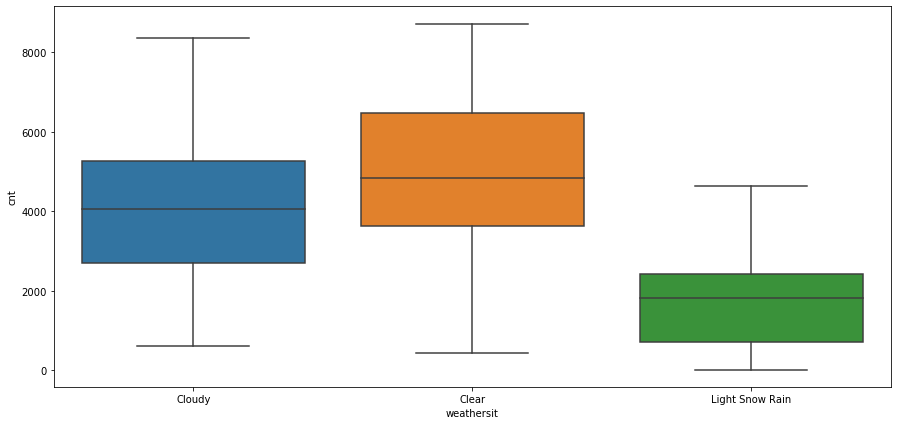

In [48]:
# Plotting weekday vs our target variable
plt.figure(figsize=(15,7))
sns.boxplot(x = 'weathersit', y = 'cnt', data = df2)
plt.show()

In [49]:
# Creating dummy variables for weathersit
dummy_weathersit = pd.get_dummies(df2['weathersit'], drop_first=True)
dummy_weathersit.nunique()

Cloudy             2
Light Snow Rain    2
dtype: int64

In [50]:
df2 = pd.concat([df2, dummy_weathersit], axis = 1)
df2.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow Rain
0,0,0,1,Cloudy,14.110847,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,Cloudy,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,Clear,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,Clear,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,Clear,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df2 = df2.drop(labels = "weathersit", axis = 1)
df2.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow Rain
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5.2 Divide the data into Train and Test

In [52]:
# Importing the required library and class
from sklearn.model_selection import train_test_split

In [53]:
np.random.seed(0)
df_train, df_test = train_test_split(df2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [54]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow Rain
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,6664,0,1,0,...,0,0,0,0,0,0,1,0,1,0
578,1,0,1,30.852500,65.9583,8.666718,7261,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,1917,1,0,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,1,10.591653,56.0833,16.292189,2739,0,0,1,...,0,0,1,0,0,0,0,0,1,0


### 5.3 Scaling the data

In [55]:
# Importing the required libraries
from sklearn.preprocessing import MinMaxScaler

In [56]:
# Instantiate an object for the class
scaler = MinMaxScaler()

In [57]:
# Subset only the numerical variables for scaling so that the interpretability of binary ones are not lost
num_vars = ["temp", "hum", "windspeed", "cnt"]
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow Rain
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [58]:
# Min - Max scaling using fit and transform 
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow Rain
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,1,0


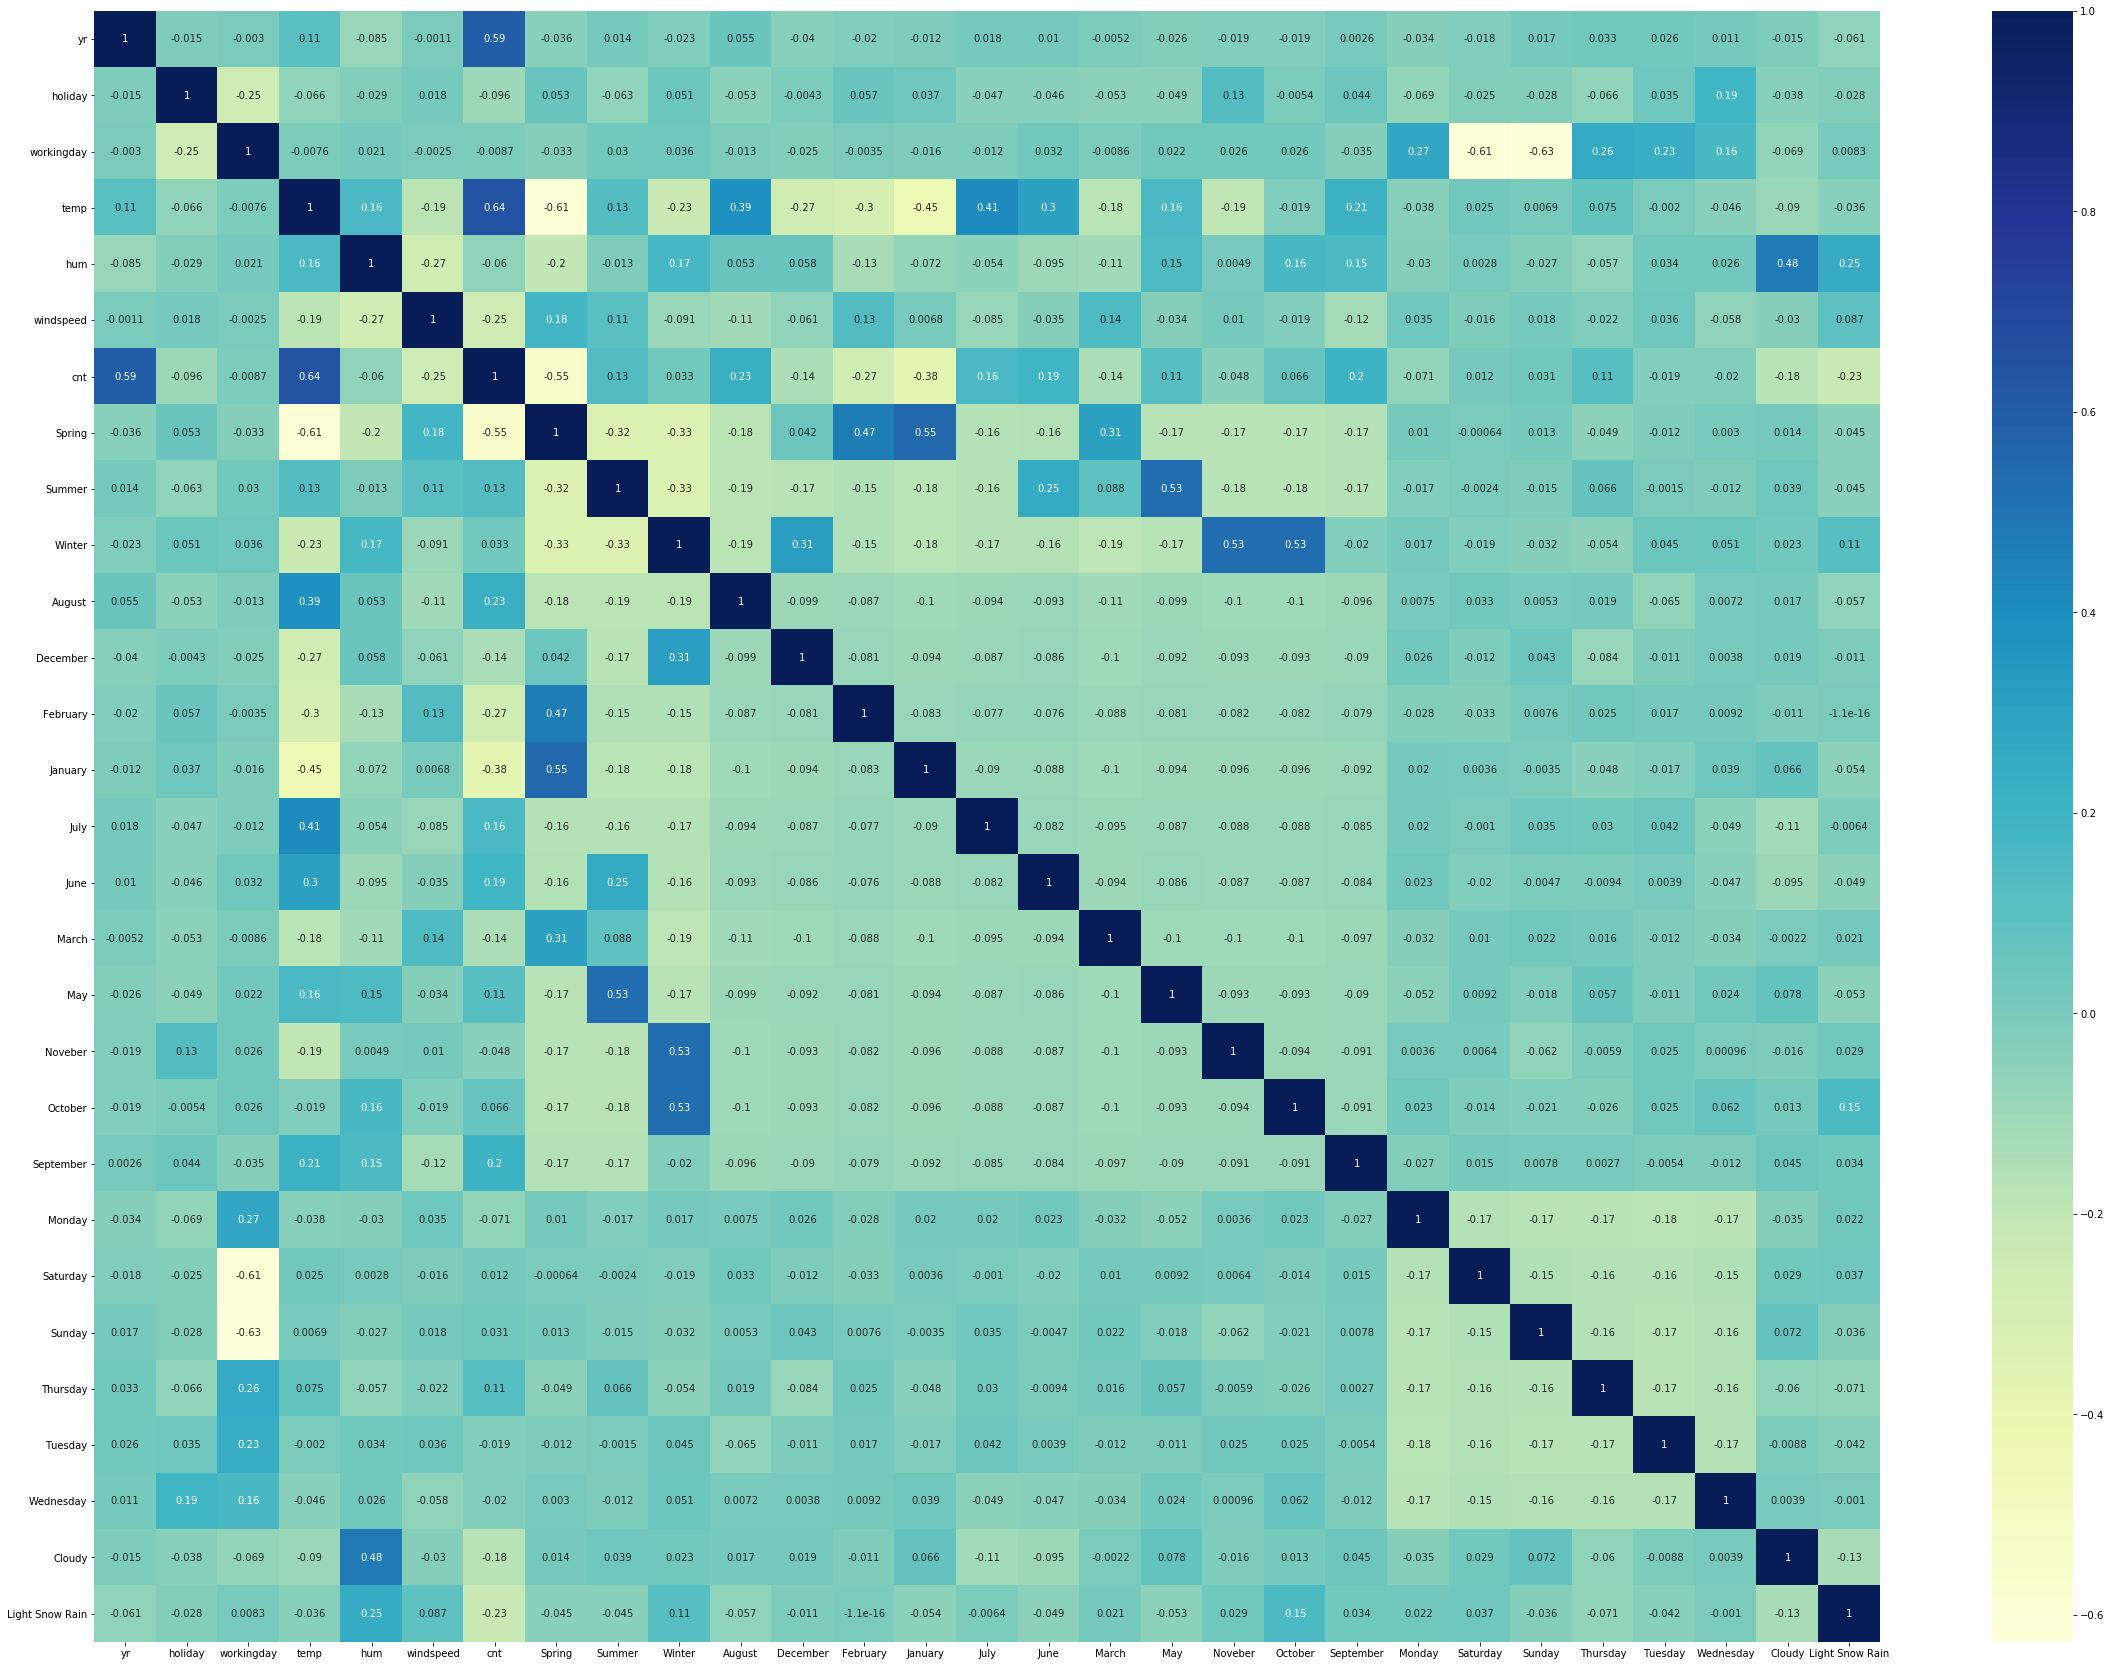

In [59]:
# Checking for correlations after scaling
fig,ax= plt.subplots()
fig.set_size_inches(40,30)
sns.heatmap(df_train.corr(), cmap="YlGnBu", annot = True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [60]:
# Divide the df into Xtrain and ytrain 
y_train = df_train.pop("cnt")
X_train = df_train

### 6. Data Modelling and Evaluation 

### 6.1 Create Linear Regression Model with stats model api

In [61]:
# Adding a constant while using stats model api library
X_train = sm.add_constant(X_train)

# Create a model - Model 1
lr = sm.OLS(y_train, X_train)

# Fit the model
lr_model = lr.fit()

# Parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          4.33e-179
Time:                        02:07:54   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3945      0.085      4.640      0.000       0.227       0.562
yr                  0.2309      0.008     28.387      0.000       0.215       0.247
holiday            -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday         -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                0.4455      0.047      9.513      0.000       0.353       0.537
hum                -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed          -0.1830      0.026     -7.036      0.000      -0.234      -0.132
Spring             -0.0437      0.030     -1.444      0.149      -0.103       0.016
Summer              0.0422      0.026      1.598      0.111      -0.010       0.094
Winter              0.1109      0.028      3.938      0.000       0.056       0.166
August              0.0215      0.034      0.632      0.527      -0.045       0.088
December           -0.0457      0.034     -1.348      0.178      -0.112       0.021
February           -0.0373      0.033     -1.121      0.263      -0.103       0.028
January            -0.0636      0.034     -1.880      0.061      -0.130       0.003
July               -0.0349      0.035     -0.985      0.325      -0.105       0.035
June                0.0010      0.025      0.038      0.969      -0.049       0.051
March               0.0006      0.025      0.025      0.980      -0.048       0.049
May                 0.0241      0.021      1.134      0.257      -0.018       0.066
Noveber            -0.0416      0.037     -1.133      0.258      -0.114       0.031
October             0.0058      0.036      0.160      0.873      -0.065       0.077
September           0.0861      0.032      2.667      0.008       0.023       0.149
Monday             -0.0246      0.015     -1.690      0.092      -0.053       0.004
Saturday           -0.0563      0.072     -0.787      0.432      -0.197       0.084
Sunday             -0.0500      0.071     -0.699      0.485      -0.190       0.091
Thursday            0.0039      0.015      0.258      0.796      -0.026       0.033
Tuesday            -0.0263      0.015     -1.792      0.074      -0.055       0.003
Wednesday          -0.0112      0.015     -0.736      0.462      -0.041       0.019
Cloudy             -0.0594      0.011     -5.637      0.000      -0.080      -0.039
Light Snow Rain    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.035
Skew:                          -0.768   Prob(JB):                     4.06e-46
Kurtosis:                       5.735   Cond. No.                         70.4


In [62]:
# Check the VIF - Model 1
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,const,463.39
3,workingday,66.32
23,Sunday,38.78
22,Saturday,36.99
7,Spring,10.80
9,Winter,9.51
8,Summer,8.29
4,temp,7.15
2,holiday,6.80
18,Noveber,6.80


### 6.2 Creating a Linear Model with Sklearn

In [63]:
# Recheck the variables
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
const              510 non-null float64
yr                 510 non-null int64
holiday            510 non-null int64
workingday         510 non-null int64
temp               510 non-null float64
hum                510 non-null float64
windspeed          510 non-null float64
Spring             510 non-null uint8
Summer             510 non-null uint8
Winter             510 non-null uint8
August             510 non-null uint8
December           510 non-null uint8
February           510 non-null uint8
January            510 non-null uint8
July               510 non-null uint8
June               510 non-null uint8
March              510 non-null uint8
May                510 non-null uint8
Noveber            510 non-null uint8
October            510 non-null uint8
September          510 non-null uint8
Monday             510 non-null uint8
Saturday           510 non-null uint8
Sunday      

In [64]:
y_train.describe()

count    510.000000
mean       0.513620
std        0.224593
min        0.000000
25%        0.356420
50%        0.518638
75%        0.684710
max        1.000000
Name: cnt, dtype: float64

In [65]:
# Running RFE - Round 1
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [66]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('const', False, 15),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('August', False, 9),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('March', False, 14),
 ('May', False, 6),
 ('Noveber', True, 1),
 ('October', False, 11),
 ('September', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 12),
 ('Tuesday', False, 7),
 ('Wednesday', False, 10),
 ('Cloudy', True, 1),
 ('Light Snow Rain', True, 1)]

<b> Note:</b><i> Now that RFE has helped us identify the top 15 variables out of the 29 present in the dataframe, we will rebuild the model using statsmodel api so that we can look at the statistics and further optimise the model by reducing the variable to top 10 or lesser</i>

In [67]:
# Subsetting columns selected by RFE method
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'December', 'January', 'July', 'Noveber', 'September',
       'Cloudy', 'Light Snow Rain'],
      dtype='object')

### <font color='green'>Model 1</font>

In [68]:
# Creating the model using stats model api
X_train_rfe = X_train[col]

In [69]:
# adding a constant
X_train_rfe = sm.add_constant(X_train_rfe)

In [70]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [71]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          3.34e-189
Time:                        02:07:54   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3202      0.036      8.886      0.000       0.249       0.391
yr                  0.2303      0.008     28.511      0.000       0.214       0.246
holiday            -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                0.4800      0.037     12.977      0.000       0.407       0.553
hum                -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed          -0.1885      0.026     -7.312      0.000      -0.239      -0.138
Spring             -0.0617      0.021     -2.907      0.004      -0.103      -0.020
Summer              0.0408      0.015      2.659      0.008       0.011       0.071
Winter              0.1034      0.018      5.763      0.000       0.068       0.139
December           -0.0372      0.017     -2.131      0.034      -0.071      -0.003
January            -0.0437      0.018     -2.415      0.016      -0.079      -0.008
July               -0.0555      0.018     -3.046      0.002      -0.091      -0.020
Noveber            -0.0409      0.019     -2.187      0.029      -0.078      -0.004
September           0.0749      0.017      4.438      0.000       0.042       0.108
Cloudy             -0.0559      0.010     -5.338      0.000      -0.076      -0.035
Light Snow Rain    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Check the VIF
vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,const,82.48
6,Spring,5.27
3,temp,4.42
8,Winter,3.83
7,Summer,2.76
4,hum,1.93
12,Noveber,1.76
10,January,1.68
14,Cloudy,1.57
9,December,1.49


<b>Note:</b><br>
<font color='blue'>[ 1 ]</font> VIF values of Spring, temp, winter and summer are high ( > 2 ), but we also note that the p - value of December and Noveber are higher than the others. Therefore we will first try dropping December and rebuild the model before proceeding.

### <font color='green'>Model 2</font>

In [73]:
# Dropping December
X = X_train_rfe.drop(['December'],axis=1)

In [74]:
# Rebuilding the model 2
X_train_rfe = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_rfe).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          2.25e-189
Time:                        02:07:54   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3030      0.035     

In [75]:
# Printing the VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,const,78.35
6,Spring,5.20
3,temp,3.97
8,Winter,3.77
7,Summer,2.67
4,hum,1.91
9,January,1.57
13,Cloudy,1.56
10,July,1.49
11,Noveber,1.48


<b>Note:</b><br>
<font color='blue'>[ 1 ]</font> VIF values of Spring, temp, winter and summer are high ( > 2 ), but we also note that the p - value of Noveber is higher than the others. Therefore we will first try dropping Noveber and rebuild the model before proceeding.

### <font color='green'>Model 3</font>

In [76]:
# Dropping Noveber
X2 = X.drop(['Noveber'],axis=1)

In [77]:
# Rebuilding the model 3
X_train_rfe = sm.add_constant(X2)
lr_3 = sm.OLS(y_train, X_train_rfe).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          4.45e-190
Time:                        02:07:54   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2957      0.035     

In [78]:
# Printing the VIF
vif = pd.DataFrame()
vif["Features"] = X2.columns
vif["VIF"] = [variance_inflation_factor(X2.values, i) for i in range (X2.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,const,76.77
6,Spring,5.08
3,temp,3.89
8,Winter,3.60
7,Summer,2.64
4,hum,1.91
9,January,1.57
12,Cloudy,1.56
10,July,1.49
11,September,1.30


<b>Note:</b><br>
<font color='blue'>[ 1 ]</font> VIF values of Spring, temp, winter and summer are high ( > 2 ), but we also note that the p - value of January has gone up. Therefore we will first try dropping January and rebuild the model before proceeding.

### <font color='green'>Model 4</font>

In [79]:
# Dropping January
X3 = X2.drop(['January'],axis=1)

In [80]:
# Rebuilding the model 3
X_train_rfe = sm.add_constant(X3)
lr_4 = sm.OLS(y_train, X_train_rfe).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.69e-190
Time:                        02:07:55   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2841      0.034     

In [81]:
# Printing the VIF
vif = pd.DataFrame()
vif["Features"] = X3.columns
vif["VIF"] = [variance_inflation_factor(X3.values, i) for i in range (X3.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,const,74.38
6,Spring,5.02
3,temp,3.61
8,Winter,3.49
7,Summer,2.61
4,hum,1.90
11,Cloudy,1.56
9,July,1.48
10,September,1.30
12,Light Snow Rain,1.24


<b>Note:</b><br>
<font color='blue'>[ 1 ]</font> Looking at the p - values, all remaining variables have a very high significance. VIF values of Spring, temp, winter and summer are high ( > 2 ), therefore we will start by dropping spring.

### <font color='green'>Model 5</font>

In [82]:
# Dropping Spring
X4 = X3.drop(['Spring'],axis=1)

In [83]:
# Rebuilding the model 5
X_train_rfe = sm.add_constant(X4)
lr_5 = sm.OLS(y_train, X_train_rfe).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          3.89e-190
Time:                        02:07:55   Log-Likelihood:                 505.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2257      0.027     

In [84]:
# Printing the VIF
vif = pd.DataFrame()
vif["Features"] = X4.columns
vif["VIF"] = [variance_inflation_factor(X4.values, i) for i in range (X4.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,const,44.99
4,hum,1.87
3,temp,1.60
10,Cloudy,1.55
8,July,1.43
6,Summer,1.33
7,Winter,1.29
11,Light Snow Rain,1.24
9,September,1.19
5,windspeed,1.18


<b>Note:</b><br>
<font color='blue'>[ 1 ]</font> All VIF values are very low ( < 2 ) and therefore there is no risk of multicollinearity. Looking at the p - values, only july seems to be higher than others, therefore we will proceed with dropping the variable.<br>
<font color='blue'>[ 2 ]</font> Generally speaking, p - values of 0.005 and below are acceptable. But as per the assignment guidelines of having 10 or lesser variables in our final model, this is the best approach.

### <font color='green'>Model 6</font>

In [86]:
#Dropping July
X5 = X4.drop(['July'],axis=1)

In [87]:
# Rebuilding the model 6
X_train_rfe = sm.add_constant(X5)
lr_6 = sm.OLS(y_train, X_train_rfe).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          7.80e-190
Time:                        02:18:18   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     499   BIC:                            -935.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2256      0.027     

In [88]:
# Printing the VIF
vif = pd.DataFrame()
vif["Features"] = X5.columns
vif["VIF"] = [variance_inflation_factor(X5.values, i) for i in range (X5.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,const,44.99
4,hum,1.86
9,Cloudy,1.55
3,temp,1.27
7,Winter,1.25
10,Light Snow Rain,1.23
6,Summer,1.19
5,windspeed,1.18
8,September,1.11
1,yr,1.03


### 6.3 Residual Analysis

In [89]:
y_train_cnt = lr_6.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

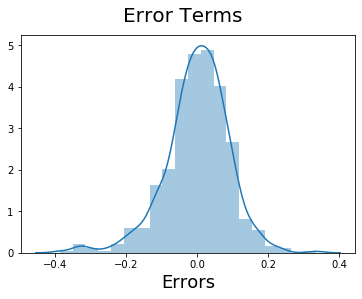

In [90]:
# Plotting the residuals to check for LR conditions

fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

<b> Looking at the distribution of the error terms, we note that they are normally distributed thus satisfying an important component of the linear regression </b>

### 6.4 Making Predictions

In [91]:
num_vars = ["temp", "hum", "windspeed", "cnt"]
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [92]:
# Divide in X_test & y_test
y_test = df_test.pop("cnt")
X_test = df_test

In [94]:
# Adding the constant
X_test = sm.add_constant(X_test)

In [95]:
X_test_new = X_test[X5.columns]

In [96]:
y_pred = lr_6.predict(X_test_new)

Text(0, 0.5, 'y_pred')

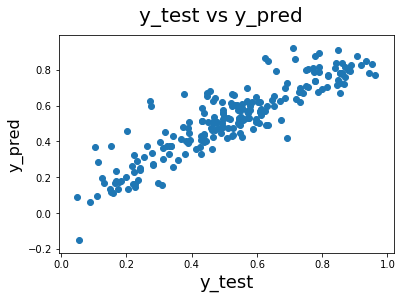

In [97]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [102]:
lr_7 = sm.OLS(y_test, X_test_new).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     93.50
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           2.67e-71
Time:                        02:40:14   Log-Likelihood:                 209.48
No. Observations:                 219   AIC:                            -397.0
Df Residuals:                     208   BIC:                            -359.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2165      0.048     

In [98]:
# Calculating R-squared score for test dataset

from sklearn.metrics import r2_score
R_sqr_score = r2_score(y_test, y_pred)
print('R_sqr_score =', R_sqr_score)

R_sqr_score = 0.8046410496371389


## Final Model

We can see that the equation of our best fitted line is:

$ y = 0.2256 + yr \times 0.2289 - holiday \times 0.0980 + temp \times 0.5706 - hum \times 0.1740 - windspeed \times 0.1867 + summer \times 0.0895 + Winter \times 0.1402 + September \times 0.1067 - Cloudy \times 0.0518 - Light Snow Rain \times 0.2367 $</b>

### Analysis and Conclusion from the above model

1. Temperature is a significant factor in predicting the number of bike rentals in a certain period
2. Light Snow Rain is the next significant factor with a negative correlation. Therefore we can conclude that the number of bike rentals in a day is likely to dip in this kind of weather
3. Windspeed is also significant and has a negative correlation
4. Adjusted $R^{2}$ value of the training model is 0.834 where as for the test model is 0.809 which is a pretty good model.